Making the model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

immo = pd.read_csv("../data/_data_clean_to_model.csv", index_col='id')
display(immo.head())
display(immo.shape)

,price,floor,bedroomCount,netHabitableSurface,constructionYear,facadeCount,floorCount,bathroomCount,showerRoomCount,toiletCount,parkingCountIndoor,parkingCountOutdoor,primaryEnergyConsumptionPerSqm,price_per_sm
id,,,,,,,,,,,,,,
10616910,399000,1.0,2.0,125.0,2013.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,142.0,3192.00
10616911,423000,2.0,3.0,155.0,2014.0,4.0,3.0,1.0,2.0,2.0,4.0,8.0,112.0,2729.03
10616934,169000,0.0,1.0,54.0,1850.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,109.0,3129.63
10616833,275000,1.0,1.0,66.0,2025.0,3.0,3.0,1.0,0.0,1.0,53.0,53.0,50.0,4166.67
10616966,185000,3.0,2.0,74.0,1975.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,238.0,2500.00


(11003, 14)

<Axes: title={'center': 'correlation'}>

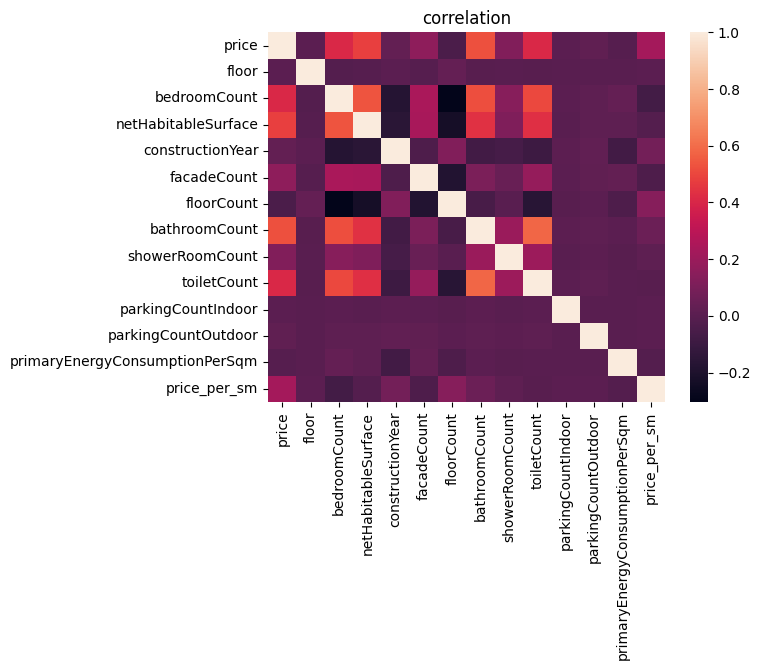

In [50]:
plt.title("correlation")
correlation = immo.corr()
sns.heatmap(correlation, annot=False, fmt='.2f')

In [38]:
X = np.array(immo.drop(columns=['price', 'price_per_sm']))
y = np.array(immo.price).reshape(-1, 1)

print(X.shape)
print(y.shape)

(11003, 12)
(11003, 1)


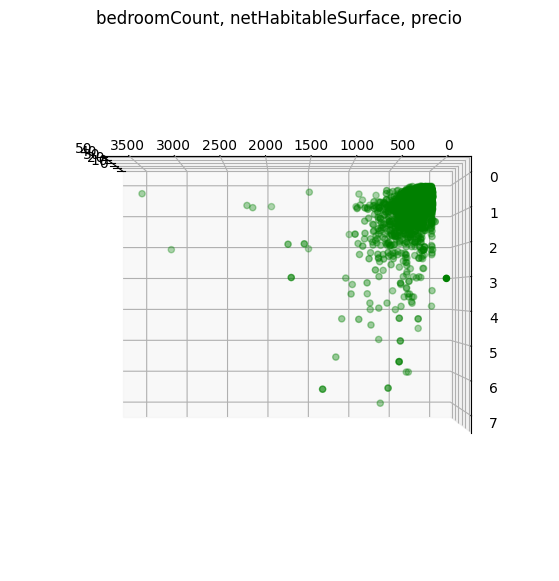

In [48]:
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(immo['bedroomCount'], immo['netHabitableSurface'], immo['price'], color = "green")
ax.view_init(180, 180)
plt.title("bedroomCount, netHabitableSurface, precio")
 
# show plot
plt.show()


In [39]:
display(immo.corr())

,price,floor,bedroomCount,netHabitableSurface,constructionYear,facadeCount,floorCount,bathroomCount,showerRoomCount,toiletCount,parkingCountIndoor,parkingCountOutdoor,primaryEnergyConsumptionPerSqm,price_per_sm
price,1.000000,0.002719,0.406400,0.479699,0.028700,0.161765,-0.046524,0.526015,0.122897,0.408625,0.003723,0.020084,-0.012537,0.230440
floor,0.002719,1.000000,-0.013776,-0.010476,0.003837,-0.011099,0.035784,-0.005826,0.000306,-0.004824,-0.000323,-0.000067,0.000228,0.003615
bedroomCount,0.406400,-0.013776,1.000000,0.534234,-0.172037,0.241763,-0.303247,0.521112,0.140735,0.505286,0.002467,0.017351,0.032858,-0.069172
netHabitableSurface,0.479699,-0.010476,0.534234,1.000000,-0.155974,0.240274,-0.231428,0.436769,0.116197,0.430409,-0.000828,0.014614,0.015405,-0.015695
constructionYear,0.028700,0.003837,-0.172037,-0.155974,1.000000,-0.037469,0.119571,-0.078977,-0.063597,-0.092380,0.012261,0.022569,-0.077253,0.083011
facadeCount,0.161765,-0.011099,0.241763,0.240274,-0.037469,1.000000,-0.183275,0.104922,0.047123,0.184348,0.006313,0.020564,0.031139,-0.034266
floorCount,-0.046524,0.035784,-0.303247,-0.231428,0.119571,-0.183275,1.000000,-0.058427,0.001306,-0.165406,-0.005604,0.006159,-0.034422,0.138851
bathroomCount,0.526015,-0.005826,0.521112,0.436769,-0.078977,0.104922,-0.058427,1.000000,0.197336,0.581804,0.009381,0.015997,0.005396,0.056778
showerRoomCount,0.122897,0.000306,0.140735,0.116197,-0.063597,0.047123,0.001306,0.197336,1.000000,0.204661,-0.001865,0.012379,-0.005694,0.016873
toiletCount,0.408625,-0.004824,0.505286,0.430409,-0.092380,0.184348,-0.165406,0.581804,0.204661,1.000000,0.006083,0.014989,0.001582,-0.003941


In [40]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[  6.   3. 285. ...   1.   1.   0.]
 [  1.   3. 113. ...   0.   0.   0.]
 [  6.   1.  50. ...   0.   0. 200.]
 ...
 [  0.   3. 106. ...   0.   0. 282.]
 [  1.   2. 115. ...   0.   1. 396.]
 [  0.   2.  89. ...   1.   1. 123.]]
[[  0.   1.  75. ...   0.   0. 226.]
 [  0.   2.  88. ...   0.   0.  82.]
 [  0.   3. 116. ...   0.   0. 690.]
 ...
 [  0.   2. 105. ...   1.  30.   0.]
 [  2.   2.  80. ...   0.   0. 121.]
 [  0.   3. 110. ...   0.   0. 146.]]
[[1900000]
 [ 282000]
 [ 208000]
 ...
 [ 525000]
 [ 249000]
 [ 379500]]
[[366000]
 [475000]
 [297000]
 ...
 [521500]
 [224734]
 [269000]]


In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.38452004374681514
intercept: [-2500517.23487971]
slope: [[ 5.14575742e+01  2.45316240e+04  9.21202201e+02  1.22510346e+03
   1.44355967e+04  9.35599687e+03  1.67416803e+05  7.73751802e+02
   2.55738197e+04 -1.96387636e+00  4.32462755e+02 -2.77488550e+00]]


In [43]:
y_pred = model.predict(X_test)
print(f"predicted response:\n{y_pred}")

predicted response:
[[260339.56715611]
 [313704.03785146]
 [249632.6747621 ]
 ...
 [457100.39716303]
 [339742.35012929]
 [292015.57778686]]


In [44]:
r_sq_test = model.score(X_test, y_test)
print(f"coefficient of determination: {r_sq_test}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.34783059858042686
intercept: [-2500517.23487971]
slope: [[ 5.14575742e+01  2.45316240e+04  9.21202201e+02  1.22510346e+03
   1.44355967e+04  9.35599687e+03  1.67416803e+05  7.73751802e+02
   2.55738197e+04 -1.96387636e+00  4.32462755e+02 -2.77488550e+00]]


ValueError: x and y must be the same size

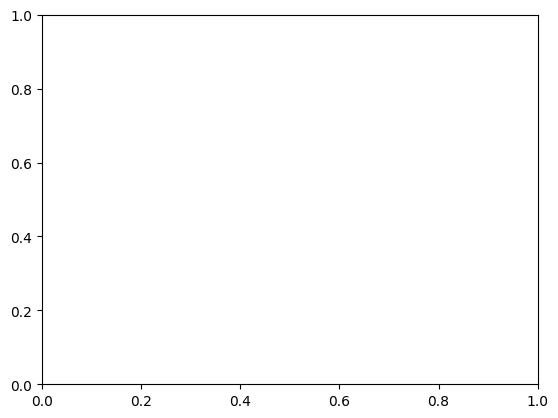

In [45]:
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_train, model.predict(X_train),color='r') 
plt.xlabel("netHabitableSurface")
plt.ylabel("Price")
plt.title('Price VS netHabitableSurface (Training set)')
plt.show()

In [46]:
test = model.predict(np.array([[0, 3, 500, 
            2005, 1, 1, 3, 
            2, 3, 1, 1, 
            100]]))
print(test)

[[1094475.1520726]]
